In [1]:
# Grzegorz Kakareko
# Florida State University
# Email: gk15b@my.fsu.edu - Phone: +1-850-570-4683

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Network for the Tree, Ntree recognition
img_width, img_height = 76, 76

train_data_dir = 'Data/train'
validation_data_dir = 'Data/val'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 100
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [3]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 7800 images belonging to 2 classes.
Found 861 images belonging to 2 classes.


In [4]:
epochs = 10
batch_size = 128

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 7800 images belonging to 2 classes.
Found 861 images belonging to 2 classes.
Epoch 1/10
15/15 [==============================] - 29s 2s/step - loss: 0.4262 - accuracy: 0.7500 - val_loss: 0.2572 - val_accuracy: 0.7708
Epoch 2/10
15/15 [==============================] - 27s 2s/step - loss: 0.2887 - accuracy: 0.7849 - val_loss: 0.2363 - val_accuracy: 0.7913
Epoch 3/10
15/15 [==============================] - 27s 2s/step - loss: 0.2798 - accuracy: 0.8358 - val_loss: 0.1997 - val_accuracy: 0.9482
Epoch 4/10
15/15 [==============================] - 28s 2s/step - loss: 0.2418 - accuracy: 0.8823 - val_loss: 0.1895 - val_accuracy: 0.9509
Epoch 5/10
15/15 [==============================] - 15s 991ms/step - loss: 0.2392 - accuracy: 0.9125 - val_loss: 0.1796 - val_accuracy: 0.9795
Epoch 6/10
15/15 [==============================] - 14s 902ms/step - loss: 0.2252 - accuracy: 0.9078 - val_loss: 0.1664 - val_accuracy: 0.9673
Epoch 7/10
15/15 [==============================] - 13s 882ms/step - lo

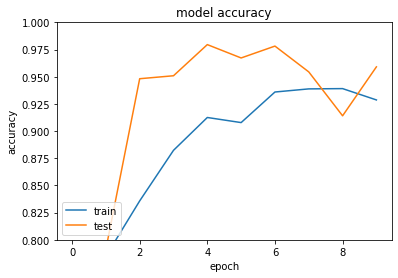

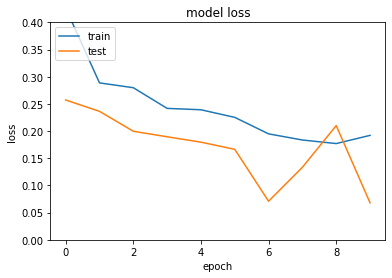

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(0.8,1) 
plt.savefig('accuracy_net1.jpg')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.4) 
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_net1.jpg')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_2.h5")